In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Anesthesia Preprocess.csv')

# Display the first few rows of the dataset
df.head()


c:\Users\jusep\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,Age,sex code (M=0; F=1),Weight (kg),ASA score,MH dx (depression; anxiety; PTSD; bipolar),Chronic pain (2 pain; FM),Resp ds (asthma; copd; osa),Anxiolytic; antidepressant (number),narcotic (yes=1; n=0),Cannabis exposure?,"Frequency of Recreational Cannabis (d,m, w,o,n)",Alcohol (drinks/week),"Smoking code (1= y, ex; 0=n)",Procedure code (EGD 0; colon 1; double 2),Duration (minutes),propofol/min,propofol/kg/min,Risk Label
0,55.0,0,90.9,3,0.0,0.0,1,0,1,1,3,18.0,1,0,10,20.0,0.22,0
1,33.0,0,97.7,2,1.0,0.0,0,2,0,1,5,5.0,1,0,3,83.3,0.85,0
2,41.0,0,84.1,3,0.0,0.0,0,0,1,1,5,0.0,1,1,13,18.5,0.22,0
3,40.0,1,66.8,3,0.0,1.0,0,3,0,1,5,0.0,1,0,5,30.0,0.45,0
4,57.0,1,67.3,3,0.0,1.0,0,0,0,1,5,0.0,1,0,2,100.0,1.49,0


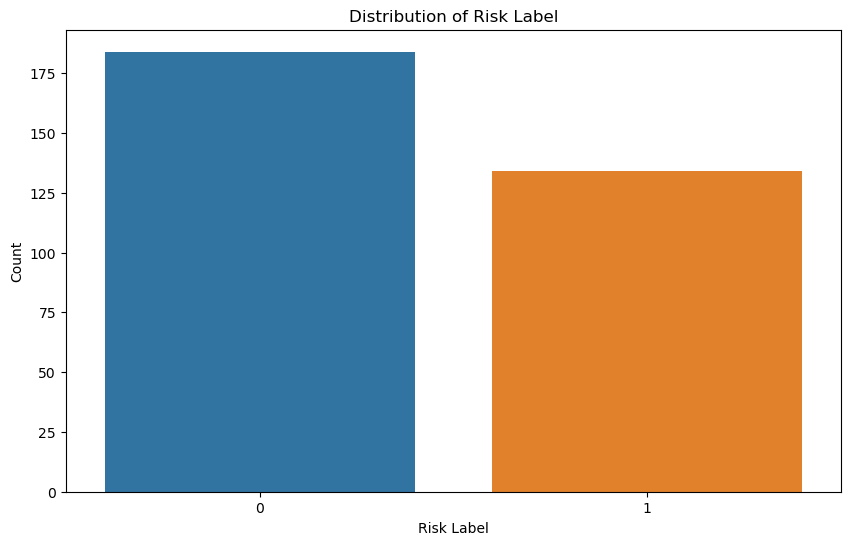

Series([], dtype: int64)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
missing_values = df.isnull().sum()

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='Risk Label', data=df)
plt.title('Distribution of Risk Label')
plt.xlabel('Risk Label')
plt.ylabel('Count')
plt.show()

# Summary of missing values
missing_values[missing_values > 0]


c:\Users\jusep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jusep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jusep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\jusep\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

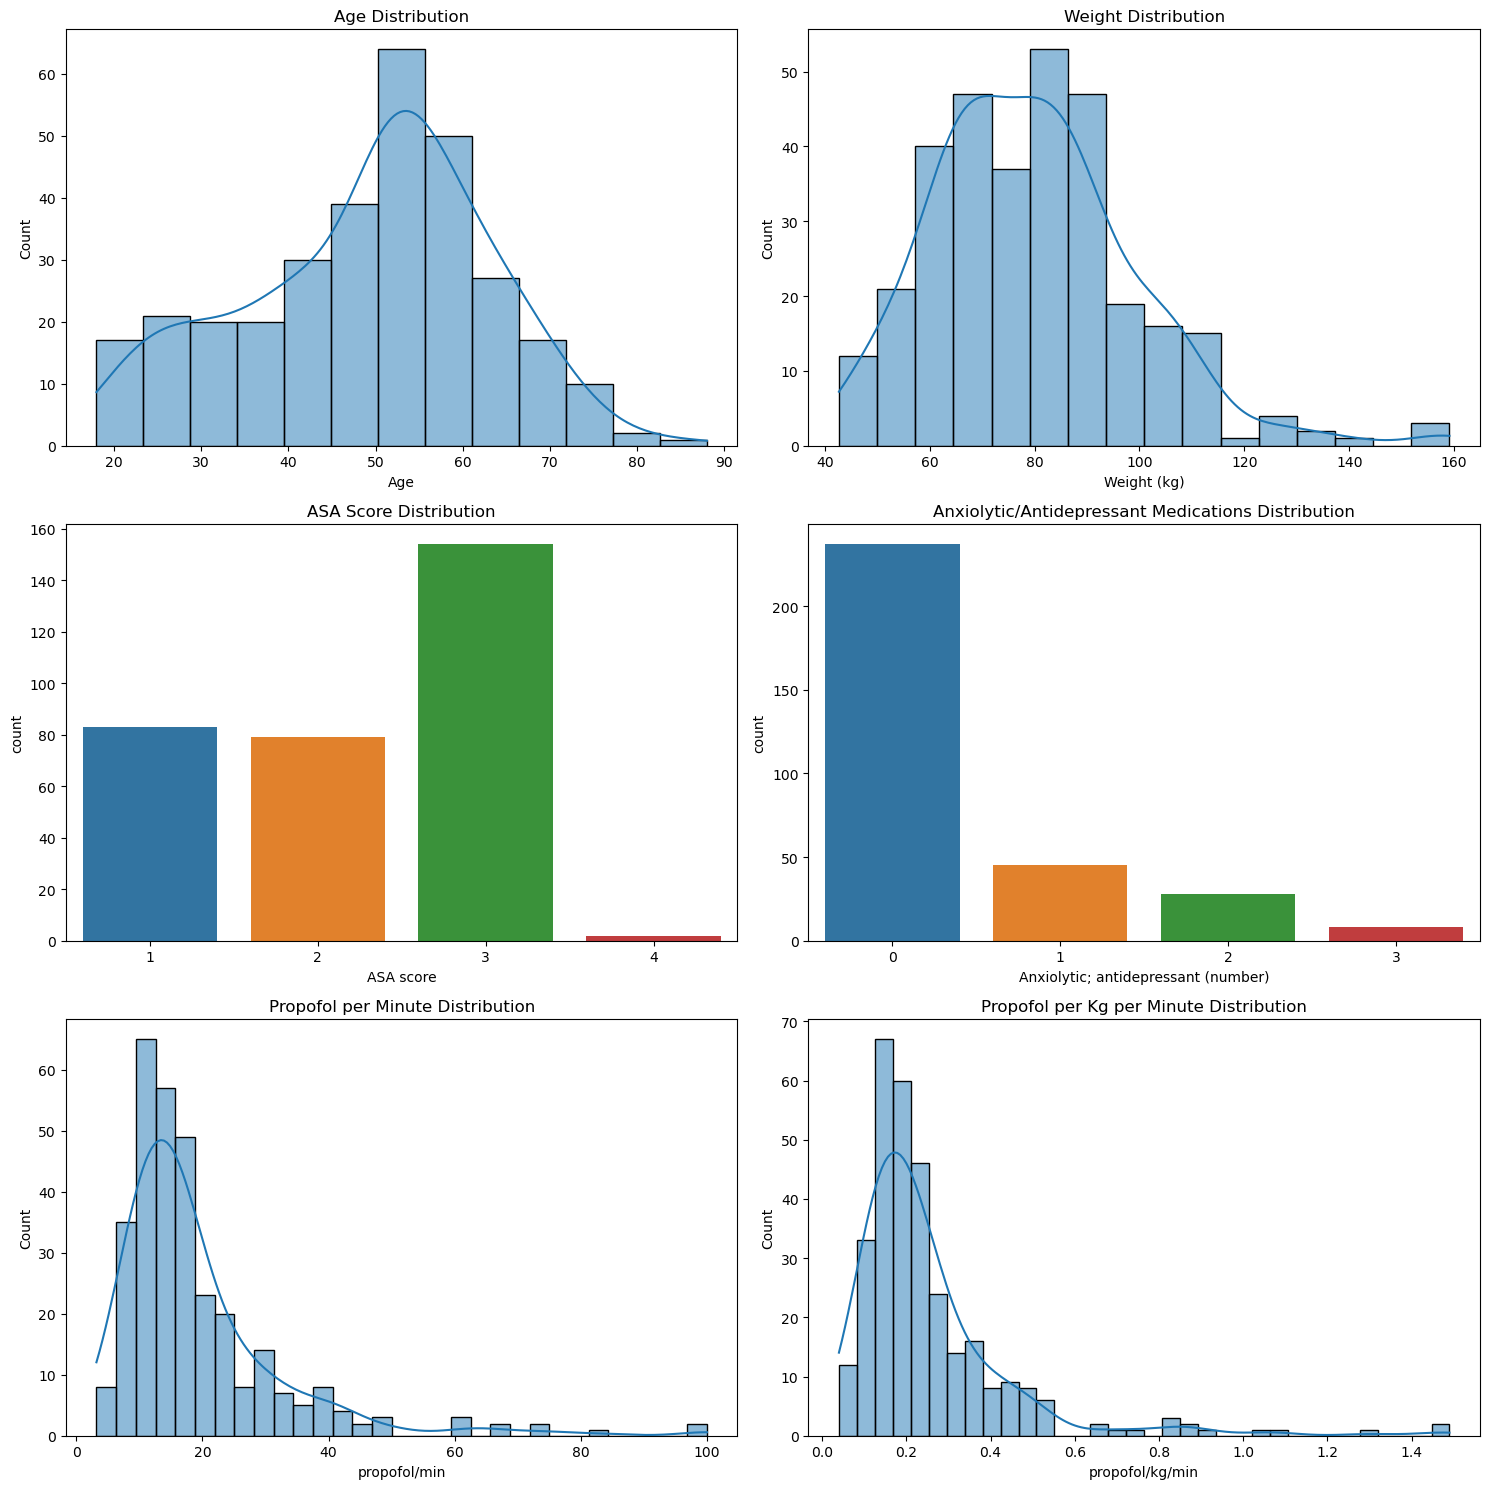

In [3]:
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

# Age distribution
sns.histplot(df['Age'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Age Distribution')

# Weight distribution
sns.histplot(df['Weight (kg)'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Weight Distribution')

# ASA Score distribution
sns.countplot(x='ASA score', data=df, ax=axs[1, 0])
axs[1, 0].set_title('ASA Score Distribution')

# Distribution of anxiolytic/antidepressant medications
sns.countplot(x='Anxiolytic; antidepressant (number)', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Anxiolytic/Antidepressant Medications Distribution')

# Propofol per minute distribution
sns.histplot(df['propofol/min'], kde=True, ax=axs[2, 0])
axs[2, 0].set_title('Propofol per Minute Distribution')

# Propofol per kg per minute distribution
sns.histplot(df['propofol/kg/min'], kde=True, ax=axs[2, 1])
axs[2, 1].set_title('Propofol per Kg per Minute Distribution')

plt.tight_layout()
plt.show()


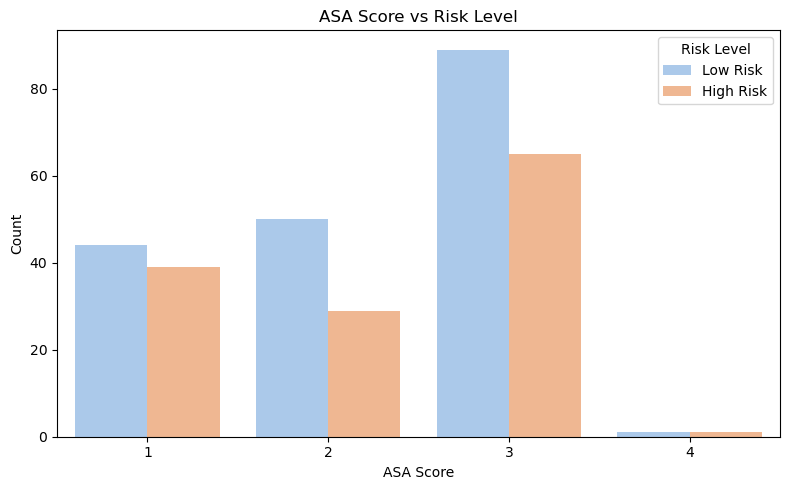

In [4]:
# Relationship between ASA score and Risk Level
plt.figure(figsize=(8, 5))
sns.countplot(x='ASA score', hue='Risk Label', data=df, palette='pastel')
plt.title('ASA Score vs Risk Level')
plt.xlabel('ASA Score')
plt.ylabel('Count')
plt.legend(title='Risk Level', labels=['Low Risk', 'High Risk'])
plt.tight_layout()
plt.show()

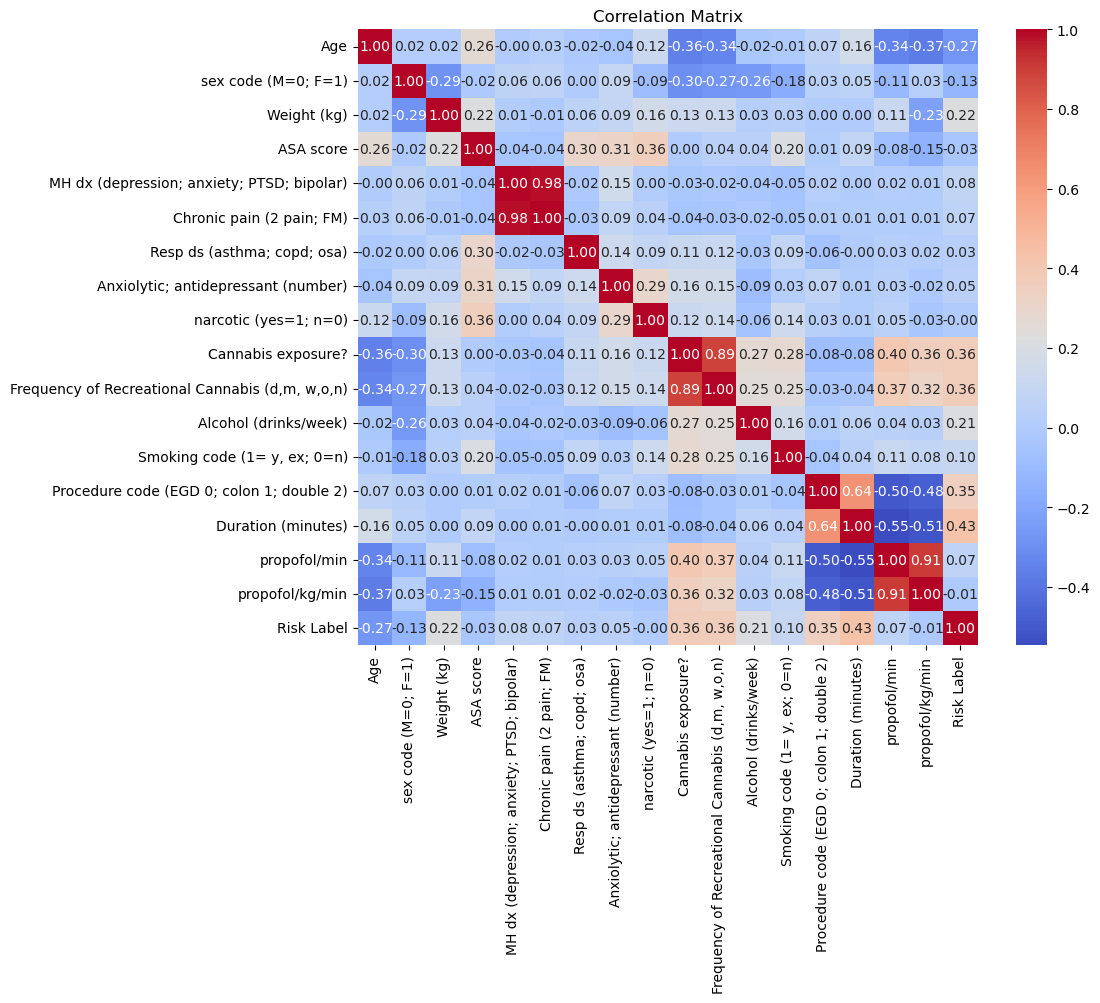

In [5]:
# Correlation Matrix
plt.figure(figsize=(10, 8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib

In [7]:
# Separate features and target variable
X = df.drop(['Risk Label'], axis=1)
y = df['Risk Label']

In [8]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [9]:
# Feature Scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [10]:
# Training the Logistic Regression model on the Training set
classifier = LogisticRegression(random_state = 42)
classifier.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_scaled)

In [12]:
# Evaluating the Model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [13]:
# Serialize the model and the scaler
model_file_path = 'logistic_regression_model.joblib'
scaler_file_path = 'standard_scaler.joblib'
joblib.dump(classifier, model_file_path)
joblib.dump(sc, scaler_file_path)

['standard_scaler.joblib']

In [14]:
accuracy, precision, recall, f1, roc_auc, model_file_path, scaler_file_path

(0.859375,
 0.9130434782608695,
 0.75,
 0.8235294117647058,
 0.8472222222222222,
 'logistic_regression_model.joblib',
 'standard_scaler.joblib')

In [15]:
# Assuming the dataset structure is consistent and the model and scaler have been correctly reloaded previously.

# Apply feature scaling using the previously loaded scaler
X_scaled = sc.transform(X)

# Extract coefficients from the loaded logistic regression model
coefficients = classifier.coef_[0]

# Mapping of feature names to their coefficients
feature_importance = {feature: coef for feature, coef in zip(X.columns, coefficients)}

# Convert to a DataFrame for visualization
feature_importance_df = pd.DataFrame(list(feature_importance.items()), columns=['Feature', 'Coefficient']).sort_values(by='Coefficient', ascending=False)

# Display the DataFrame
feature_importance_df.head()


,Feature,Coefficient
14,Duration (minutes),1.865777
15,propofol/min,1.006775
13,Procedure code (EGD 0; colon 1; double 2),0.671189
9,Cannabis exposure?,0.545154
4,MH dx (depression; anxiety; PTSD; bipolar),0.527832


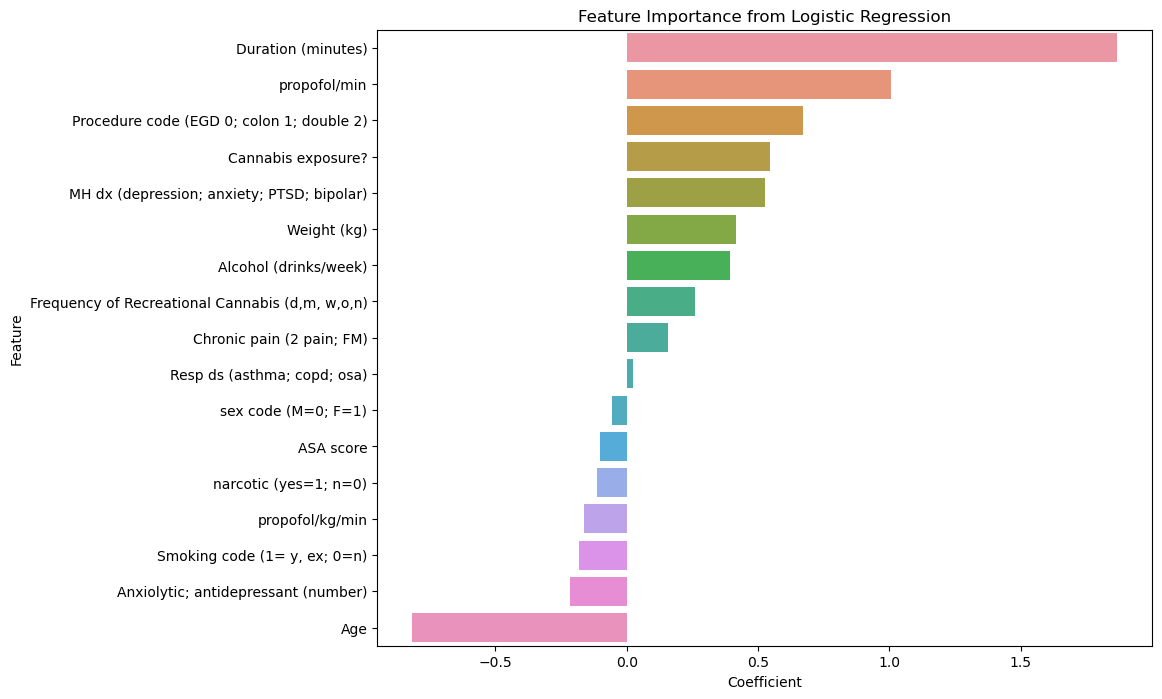

In [16]:


# Assuming 'coefficients' contains the model's coefficients and 'X.columns' contains the feature names
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Visualization
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance_df, x='Coefficient', y='Feature')
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()
